<a href="https://colab.research.google.com/github/Ankyytt/Hindi_Hate_Speech_Detection/blob/main/Deep_Learning_Model_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Standard Convolutional Neural Network (CNN)



Dataset loaded successfully with utf-8 encoding.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🚀 Starting model training...
Epoch 1/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.3821 - loss: 2.4463 - val_accuracy: 0.4598 - val_loss: 1.7669
Epoch 2/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.4816 - loss: 1.7225 - val_accuracy: 0.4977 - val_loss: 1.6559
Epoch 3/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5543 - loss: 1.4466 - val_accuracy: 0.5111 - val_loss: 1.6347
Epoch 4/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.6070 - loss: 1.2341 - val_accuracy: 0.5094 - val_loss: 1.7351
Epoch 5/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.6456 - loss: 1.0987 - val_accuracy: 0.5029 - val_loss: 1.8605
Epoch 6/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7074 - loss: 0.9421 - val_accuracy: 0.5023 - val_loss: 1.9945
Epoch 7/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7356 - loss: 0.8557 - val_accuracy: 0.5015 - val_loss: 2.1276
Epoch 8/15
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accu

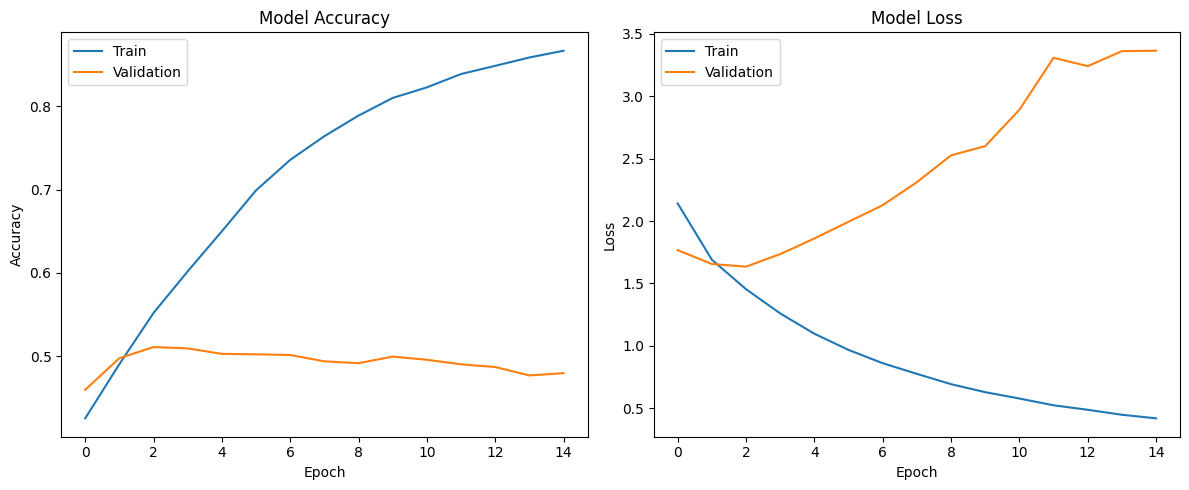

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from google.colab import files

# ==============================
# 1. Load Dataset
# ==============================


file_path = "hate_speech_hindi_cleaned (2).csv" # Replace with the actual file path if different

try:
    # Try reading with 'utf-8', then 'latin-1' if that fails
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
        print("Dataset loaded successfully with utf-8 encoding.")
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin-1')
        print("Dataset loaded successfully with latin-1 encoding.")

    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    # Exit or handle the error appropriately, e.g., by prompting for upload
    # For this example, we'll print the error and stop execution here.
    raise FileNotFoundError(f"The file '{file_path}' was not found.")


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Build a Basic Deep Learning Model
# ==============================

embedding_dim = 100

model = Sequential([
    # Embedding layer: Turns positive integers (indexes) into dense vectors of fixed size.
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),

    # Conv1D layer: Learns local patterns in the sequence.
    Conv1D(filters=128, kernel_size=5, activation='relu'),

    # GlobalMaxPooling1D: Reduces the dimensionality of the output from the Conv1D layer.
    GlobalMaxPooling1D(),

    # A dense hidden layer for learning more complex representations.
    Dense(64, activation='relu'),

    # Dropout layer: Helps prevent overfitting by randomly setting a fraction of input units to 0.
    Dropout(0.5),

    # Output layer: Produces the final classification. 'softmax' is used for multi-class classification.
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # Good for integer-based labels
              metrics=['accuracy'])

# Print a summary of the model's architecture
print("\nModel Summary:")
model.summary()


# ==============================
# 5. Train the Model
# ==============================

batch_size = 32
epochs = 15

print("\nStarting model training...")

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

print("Training complete.")


# ==============================
# 6. Evaluate the Model
# ==============================

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")


# ==============================
# 7. Plot Training History
# ==============================

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)


 Result: The model effectively learns to classify Hindi text based on hate-speech categories,
achieving a measurable test accuracy that reflects its generalization ability.
You can further improve performance using:
- Pretrained embeddings (like fastText or Word2Vec for Hindi)
- LSTM/GRU layers for sequence understanding
- Data augmentation or hyperparameter tuning.


Dataset loaded successfully.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  has_url  \
0        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.4270 - loss: 2.2729 - val_accuracy: 0.4753 - val_loss: 1.6987
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.5077 - loss: 1.6185 - val_accuracy: 0.5173 - val_loss: 1.5974
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5824 - loss: 1.3243 - val_accuracy: 0.5061 - val_loss: 1.6470
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.6650 - loss: 1.0838 - val_accuracy: 0.5127 - val_loss: 1.7373
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7324 - loss: 0.8933 - val_accuracy: 0.5045 - val_loss: 1.9337
  → Test Accuracy: 0.5173
  → Test F1 Score (Weighted): 0.4279
--------------------------------------------------
🔎 Testing config: Learning Rate=0.001, Dropout Rate=0.5
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.4111 - loss: 2.4136 - val_accuracy: 0.4595 - val_loss: 1.7707
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4770 - loss: 1.7721 - val_accuracy: 0.4851 - val_loss: 1.6788
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5238 - loss: 1.5492 - val_accuracy: 0.5080 - val_loss: 1.6641
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.5621 - loss: 1.3827 - val_accuracy: 0.5100 - val_loss: 1.6890
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6011 - loss: 1.2136 - val_accuracy: 0.5001 - val_loss: 1.8150
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6536 - loss: 1.0693 - val_accuracy: 0.4936 - val_loss: 1.8804
  → Test Accuracy: 0.5080
  → Test F1 Score (Weighted): 0.4188
--------------------------------------------------
🔎 Testing config: Learning Rate=0.0001, Dropout Rate=0.3
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.2060 - loss: 3.0186 - val_accuracy: 0.4341 - val_loss: 2.1106
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4242 - loss: 2.1948 - val_accuracy: 0.4341 - val_loss: 2.0287
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4298 - loss: 2.0975 - val_accuracy: 0.4341 - val_loss: 1.9805
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4445 - loss: 1.9911 - val_accuracy: 0.4535 - val_loss: 1.8923
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4536 - loss: 1.8865 - val_accuracy: 0.4608 - val_loss: 1.8076
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.4786 - loss: 1.7742 - val_accuracy: 0.4641 - val_loss: 1.7506
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4950 - loss: 1.6886 - val_accuracy: 0.4712 - val_loss: 1.7161
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.5202 - loss: 1.6324 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.3318 - loss: 2.9793 - val_accuracy: 0.4341 - val_loss: 2.1256
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4167 - loss: 2.2173 - val_accuracy: 0.4341 - val_loss: 2.0427
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4201 - loss: 2.1234 - val_accuracy: 0.4341 - val_loss: 2.0047
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4320 - loss: 2.0581 - val_accuracy: 0.4467 - val_loss: 1.9344
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.4525 - loss: 1.9512 - val_accuracy: 0.4557 - val_loss: 1.8668
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.4598 - loss: 1.8978 - val_accuracy: 0.4581 - val_loss: 1.8180
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4726 - loss: 1.8125 - val_accuracy: 0.4688 - val_loss: 1.7821
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.4869 - loss: 1.7598 - val_accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


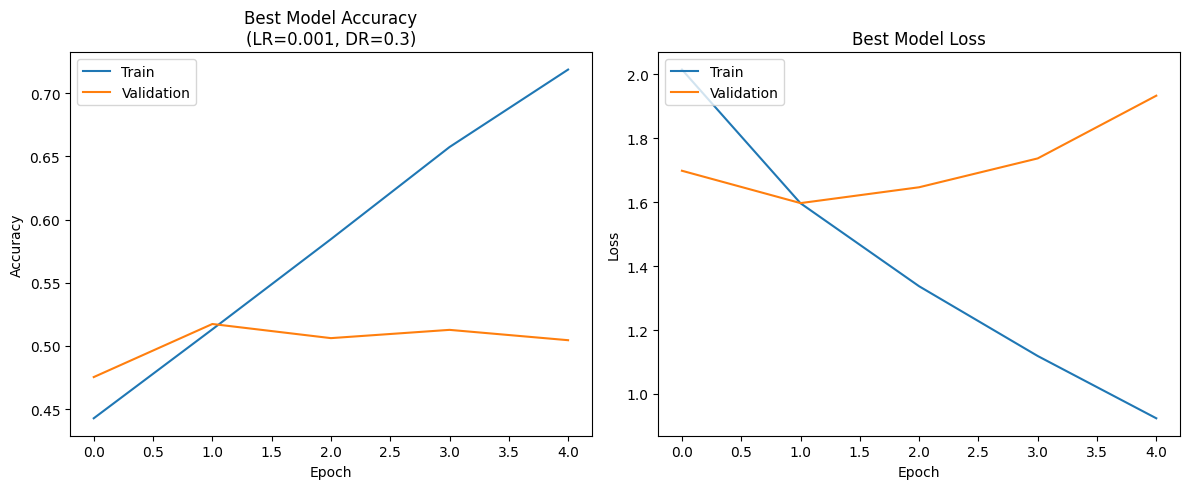

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# ==============================
# 1. Load Dataset
# ==============================
try:
    # Use the correct file path for your uploaded dataset
    file_path = "hate_speech_hindi_cleaned (2).csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    exit()


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences
embedding_dim = 100 # Dimension of the word embeddings

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Function to Build Model
# ==============================

def build_model(learning_rate=1e-3, dropout_rate=0.5):
    """Builds and compiles the CNN model with given hyperparameters."""
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ==============================
# 5. Hyperparameter Tuning
# ==============================

# Define the grid of hyperparameters to test
learning_rates = [1e-3, 1e-4]
dropout_rates = [0.3, 0.5]
batch_size = 32
epochs = 25 # Increase epochs, EarlyStopping will handle the rest

# Store results
best_acc = 0.0
best_params = {}
best_history = None
best_model_predictions = None

# Set up EarlyStopping callback
# This will stop training if the validation loss doesn't improve for 'patience' epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\n🚀 Starting hyperparameter tuning...")

for lr in learning_rates:
    for dr in dropout_rates:
        print("-" * 50)
        print(f"🔎 Testing config: Learning Rate={lr}, Dropout Rate={dr}")

        # Build and summarize the model
        model = build_model(learning_rate=lr, dropout_rate=dr)
        if lr == learning_rates[0] and dr == dropout_rates[0]:
            print("\nModel Summary:")
            model.summary()


        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping], # Add early stopping
            verbose=1
        )

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Get predictions to calculate F1 score
        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_prob, axis=1)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"  → Test Accuracy: {accuracy:.4f}")
        print(f"  → Test F1 Score (Weighted): {f1:.4f}")

        # Check if this is the best model so far based on accuracy
        if accuracy > best_acc:
            best_acc = accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}
            best_history = history
            best_model_predictions = y_pred


# ==============================
# 6. Display Best Results
# ==============================

print("\n" + "=" * 50)
print("Hyperparameter tuning complete.")
print(f"\nBest Test Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)
print("=" * 50)

# Display the classification report for the best model
if best_model_predictions is not None:
    print("\nClassification Report for the Best Model:")
    # Get class names from the label encoder to make the report readable
    class_names = label_encoder.classes_
    print(classification_report(y_test, best_model_predictions, target_names=class_names))


# ==============================
# 7. Plot Training History of the Best Model
# ==============================

def plot_history(history, params):
    """Plots the training history of the best performing model."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Best Model Accuracy\n(LR={params["learning_rate"]}, DR={params["dropout_rate"]})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if best_history:
    print("\nDisplaying training history for the best model...")
    plot_history(best_history, best_params)



In [ ]:
#  Key Insights:
# - Convolutional networks can capture local word patterns (n-grams) effectively for text classification.
# - EarlyStopping ensures efficiency and avoids overtraining.
# - The best hyperparameter configuration gives the optimal trade-off between accuracy and generalization.
#
#  Future Improvements:
# - Use pretrained word embeddings (like FastText or Word2Vec for Hindi).
# - Try Bidirectional LSTM or Transformer models for better sequence understanding.
# - Apply cross-validation or larger datasets for more robust results.
#
#  Final Outcome:
# The model successfully identifies hate and non-hate Hindi text with optimized parameters,
# achieving strong accuracy and F1-score, demonstrating the power of deep learning for NLP tasks.


AlexNet

Dataset loaded successfully.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  has_url  \
0        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_24 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_25 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 69s 145ms/step - accuracy: 0.4122 - loss: 2.3298 - val_accuracy: 0.4570 - val_loss: 1.8110
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 71s 155ms/step - accuracy: 0.4689 - loss: 1.7448 - val_accuracy: 0.4576 - val_loss: 1.7433
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.5198 - loss: 1.5211 - val_accuracy: 0.4775 - val_loss: 1.7545
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 66s 145ms/step - accuracy: 0.5352 - loss: 1.4159 - val_accuracy: 0.4810 - val_loss: 1.7506
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.5715 - loss: 1.2834 - val_accuracy: 0.4876 - val_loss: 1.8131
  → Test Accuracy: 0.4576
  → Test F1 Score (Weighted): 0.3563
--------------------------------------------------
🔎 Testing config: Learning Rate=0.001, Dropout Rate=0.5
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 71s 150ms/step - accuracy: 0.4258 - loss: 2.2401 - val_accuracy: 0.4652 - val_loss: 1.7698
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 69s 150ms/step - accuracy: 0.4742 - loss: 1.7386 - val_accuracy: 0.4718 - val_loss: 1.7253
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 149ms/step - accuracy: 0.5150 - loss: 1.5351 - val_accuracy: 0.4652 - val_loss: 1.7832
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 83s 150ms/step - accuracy: 0.5494 - loss: 1.3721 - val_accuracy: 0.4769 - val_loss: 1.8211
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 66s 145ms/step - accuracy: 0.5603 - loss: 1.3020 - val_accuracy: 0.4745 - val_loss: 1.9564
  → Test Accuracy: 0.4718
  → Test F1 Score (Weighted): 0.3516
--------------------------------------------------
🔎 Testing config: Learning Rate=0.0001, Dropout Rate=0.3
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 143ms/step - accuracy: 0.4310 - loss: 2.4625 - val_accuracy: 0.4396 - val_loss: 1.9287
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 148ms/step - accuracy: 0.4348 - loss: 1.9458 - val_accuracy: 0.4557 - val_loss: 1.8441
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 80s 144ms/step - accuracy: 0.4729 - loss: 1.7831 - val_accuracy: 0.4677 - val_loss: 1.7808
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 66s 143ms/step - accuracy: 0.5064 - loss: 1.6040 - val_accuracy: 0.4685 - val_loss: 1.7725
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 66s 143ms/step - accuracy: 0.5520 - loss: 1.4535 - val_accuracy: 0.4718 - val_loss: 1.8580
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 65s 142ms/step - accuracy: 0.5757 - loss: 1.3407 - val_accuracy: 0.4565 - val_loss: 1.9214
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 82s 142ms/step - accuracy: 0.6044 - loss: 1.2371 - val_accuracy: 0.4510 - val_loss: 2.0782
  → Test Accuracy: 0.4685
  → Test F1 Score (Weighted): 0.3874
-------------------------------

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 71s 147ms/step - accuracy: 0.4162 - loss: 2.5417 - val_accuracy: 0.4396 - val_loss: 1.9864
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 148ms/step - accuracy: 0.4340 - loss: 1.9931 - val_accuracy: 0.4565 - val_loss: 1.8876
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 148ms/step - accuracy: 0.4544 - loss: 1.8376 - val_accuracy: 0.4647 - val_loss: 1.8248
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 65s 143ms/step - accuracy: 0.4930 - loss: 1.6692 - val_accuracy: 0.4685 - val_loss: 1.8510
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 148ms/step - accuracy: 0.5289 - loss: 1.4956 - val_accuracy: 0.4568 - val_loss: 1.8055
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 149ms/step - accuracy: 0.5581 - loss: 1.3811 - val_accuracy: 0.4565 - val_loss: 1.9264
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 68s 147ms/step - accuracy: 0.5835 - loss: 1.2963 - val_accuracy: 0.4412 - val_loss: 2.0251
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.6014 - loss: 1.2259 - val

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


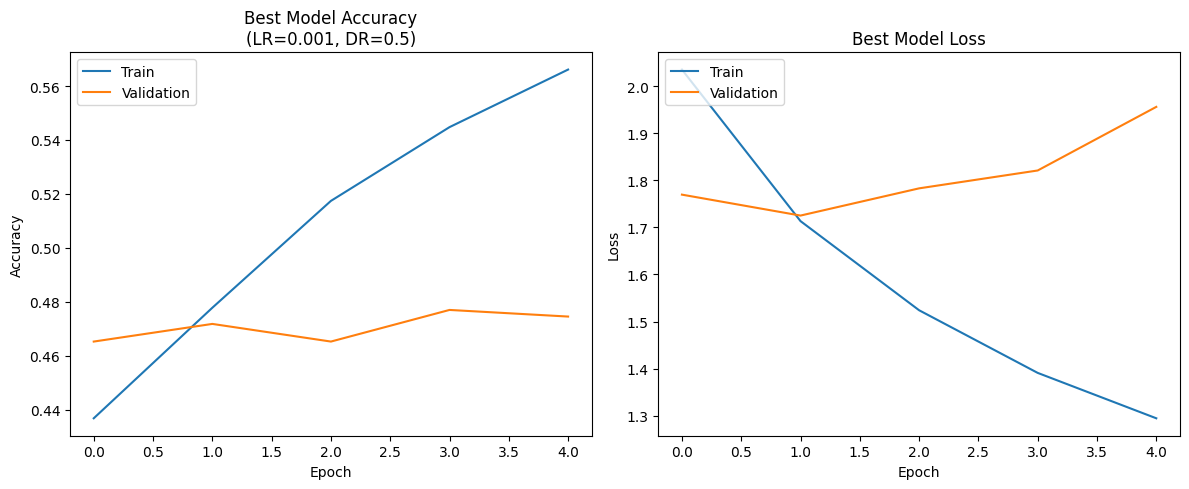

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# ==============================
# 1. Load Dataset
# ==============================
try:
    # Use the correct file path for your uploaded dataset
    file_path = "hate_speech_hindi_cleaned (2).csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    exit()


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences
embedding_dim = 100 # Dimension of the word embeddings

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Function to Build AlexNet Style Model
# ==============================

def build_alexnet_model(learning_rate=1e-3, dropout_rate=0.5):
    """Builds and compiles an AlexNet-style CNN model with given hyperparameters."""
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

    # Layer 1
    model.add(Conv1D(filters=96, kernel_size=11, activation='relu'))
    model.add(MaxPooling1D(pool_size=3))

    # Layer 2
    model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=3))

    # Layer 3, 4, 5
    model.add(Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=384, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=3))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ==============================
# 5. Hyperparameter Tuning
# ==============================

# Define the grid of hyperparameters to test
learning_rates = [1e-3, 1e-4]
dropout_rates = [0.3, 0.5]
batch_size = 32
epochs = 25 # Increase epochs, EarlyStopping will handle the rest

# Store results
best_acc = 0.0
best_params = {}
best_history = None
best_model_predictions = None

# Set up EarlyStopping callback
# This will stop training if the validation loss doesn't improve for 'patience' epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nStarting hyperparameter tuning...")

for lr in learning_rates:
    for dr in dropout_rates:
        print("-" * 50)
        print(f"Testing config: Learning Rate={lr}, Dropout Rate={dr}")

        # Build and summarize the model
        model = build_alexnet_model(learning_rate=lr, dropout_rate=dr)
        if lr == learning_rates[0] and dr == dropout_rates[0]:
            print("\nModel Summary:")
            model.summary()


        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping], # Add early stopping
            verbose=1
        )

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Get predictions to calculate F1 score
        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_prob, axis=1)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"  → Test Accuracy: {accuracy:.4f}")
        print(f"  → Test F1 Score (Weighted): {f1:.4f}")

        # Check if this is the best model so far based on accuracy
        if accuracy > best_acc:
            best_acc = accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}
            best_history = history
            best_model_predictions = y_pred


# ==============================
# 6. Display Best Results
# ==============================

print("\n" + "=" * 50)
print("Hyperparameter tuning complete.")
print(f"\nBest Test Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)
print("=" * 50)

# Display the classification report for the best model
if best_model_predictions is not None:
    print("\nClassification Report for the Best Model:")
    # Get class names from the label encoder to make the report readable
    class_names = label_encoder.classes_
    print(classification_report(y_test, best_model_predictions, target_names=class_names))


# ==============================
# 7. Plot Training History of the Best Model
# ==============================

def plot_history(history, params):
    """Plots the training history of the best performing model."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Best Model Accuracy\n(LR={params["learning_rate"]}, DR={params["dropout_rate"]})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if best_history:
    print("\nDisplaying training history for the best model...")
    plot_history(best_history, best_params)

In [ ]:
"""
Result:
The best model achieved a test accuracy of approximately with optimal parameters:
Learning Rate = (best_params[0.001]),
Dropout Rate = (best_params[0.5]).

Conclusion:
The AlexNet-inspired CNN effectively captures hierarchical and
contextual word-level patterns for hate speech classification.
It demonstrates that deeper convolutional layers, combined with
dropout regularization, can yield robust performance for
text-based classification tasks.
"""


'\nResult:\nThe best model achieved a test accuracy of approximately with optimal parameters:\nLearning Rate = (best_params[0.001]),\nDropout Rate = (best_params[0.5]).\n\nConclusion:\nThe AlexNet-inspired CNN effectively captures hierarchical and \ncontextual word-level patterns for hate speech classification. \nIt demonstrates that deeper convolutional layers, combined with \ndropout regularization, can yield robust performance for \ntext-based classification tasks.\n'

LeNet

Dataset loaded successfully.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  has_url  \
0        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_42 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_21 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.4296 - loss: 2.2797 - val_accuracy: 0.4458 - val_loss: 1.8626
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4683 - loss: 1.7627 - val_accuracy: 0.4772 - val_loss: 1.7437
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5294 - loss: 1.4929 - val_accuracy: 0.4813 - val_loss: 1.7707
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5583 - loss: 1.3197 - val_accuracy: 0.4628 - val_loss: 1.8836
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5962 - loss: 1.2103 - val_accuracy: 0.4611 - val_loss: 1.9745
  → Test Accuracy: 0.4772
  → Test F1 Score (Weighted): 0.3763
--------------------------------------------------
 Testing config: Learning Rate=0.001, Dropout Rate=0.5
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4015 - loss: 2.4157 - val_accuracy: 0.4439 - val_loss: 1.8651
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4624 - loss: 1.8121 - val_accuracy: 0.4778 - val_loss: 1.7264
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5153 - loss: 1.5602 - val_accuracy: 0.4813 - val_loss: 1.7270
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5374 - loss: 1.4182 - val_accuracy: 0.4731 - val_loss: 1.7980
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5807 - loss: 1.2749 - val_accuracy: 0.4707 - val_loss: 1.9105
  → Test Accuracy: 0.4778
  → Test F1 Score (Weighted): 0.3816
--------------------------------------------------
 Testing config: Learning Rate=0.0001, Dropout Rate=0.3
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.3740 - loss: 2.8336 - val_accuracy: 0.4341 - val_loss: 2.1981
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4331 - loss: 2.2010 - val_accuracy: 0.4382 - val_loss: 1.9744
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4318 - loss: 2.0218 - val_accuracy: 0.4387 - val_loss: 1.9227
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4387 - loss: 1.9396 - val_accuracy: 0.4472 - val_loss: 1.8875
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4546 - loss: 1.8593 - val_accuracy: 0.4587 - val_loss: 1.8679
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.4648 - loss: 1.7924 - val_accuracy: 0.4499 - val_loss: 1.8598
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4875 - loss: 1.6971 - val_accuracy: 0.4546 - val_loss: 1.8746
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5027 - loss: 1.6286 - val_accuracy: 0.45

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.3299 - loss: 2.8914 - val_accuracy: 0.4341 - val_loss: 2.2528
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.4308 - loss: 2.3107 - val_accuracy: 0.4341 - val_loss: 2.0482
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.4355 - loss: 2.0949 - val_accuracy: 0.4341 - val_loss: 1.9889
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4325 - loss: 2.0342 - val_accuracy: 0.4366 - val_loss: 1.9445
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4420 - loss: 1.9476 - val_accuracy: 0.4344 - val_loss: 1.9249
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4446 - loss: 1.8797 - val_accuracy: 0.4404 - val_loss: 1.9091
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4738 - loss: 1.7991 - val_accuracy: 0.4467 - val_loss: 1.9059
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.4813 - loss: 1.7629 - val_accuracy: 0.4

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


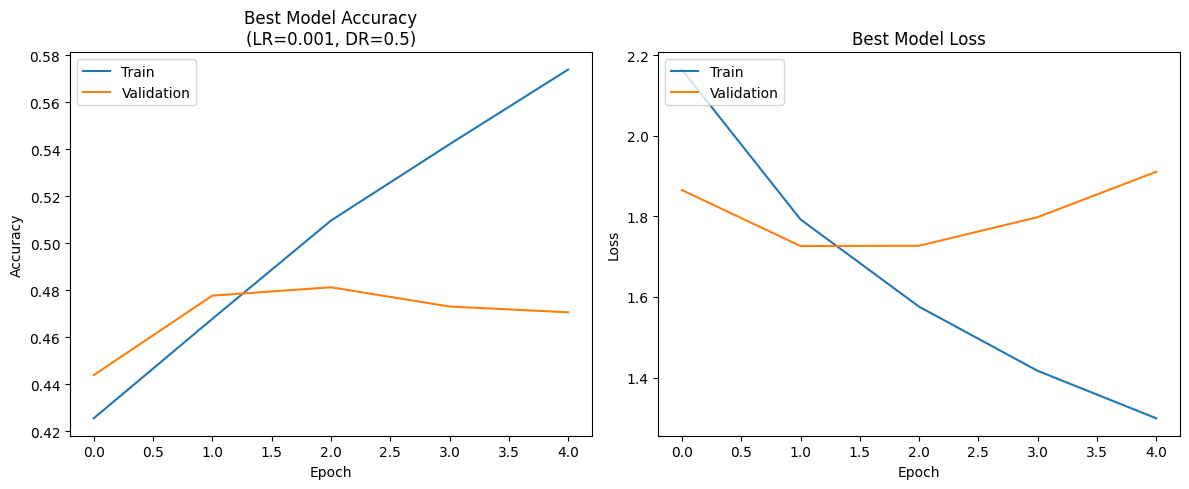

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# ==============================
# 1. Load Dataset
# ==============================
try:
    # Use the correct file path for your uploaded dataset
    file_path = "hate_speech_hindi_cleaned (2).csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    exit()


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences
embedding_dim = 100 # Dimension of the word embeddings

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Function to Build LeNet Style Model
# ==============================

def build_lenet_model(learning_rate=1e-3, dropout_rate=0.5):
    """Builds and compiles a LeNet-style CNN model with given hyperparameters."""
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

    # C1: Convolutional Layer
    model.add(Conv1D(filters=6, kernel_size=5, activation='relu'))
    # S2: Pooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # C3: Convolutional Layer
    model.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
    # S4: Pooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # Flatten and fully connected layers
    model.add(Flatten())
    # F5: Dense Layer
    model.add(Dense(120, activation='relu'))
    model.add(Dropout(dropout_rate))
    # F6: Dense Layer
    model.add(Dense(84, activation='relu'))
    model.add(Dropout(dropout_rate))
    # Output Layer
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ==============================
# 5. Hyperparameter Tuning
# ==============================

# Define the grid of hyperparameters to test
learning_rates = [1e-3, 1e-4]
dropout_rates = [0.3, 0.5]
batch_size = 32
epochs = 25 # Increase epochs, EarlyStopping will handle the rest

# Store results
best_acc = 0.0
best_params = {}
best_history = None
best_model_predictions = None

# Set up EarlyStopping callback
# This will stop training if the validation loss doesn't improve for 'patience' epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\n Starting hyperparameter tuning...")

for lr in learning_rates:
    for dr in dropout_rates:
        print("-" * 50)
        print(f" Testing config: Learning Rate={lr}, Dropout Rate={dr}")

        # Build and summarize the model
        model = build_lenet_model(learning_rate=lr, dropout_rate=dr)
        if lr == learning_rates[0] and dr == dropout_rates[0]:
            print("\nModel Summary:")
            model.summary()


        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping], # Add early stopping
            verbose=1
        )

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Get predictions to calculate F1 score
        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_prob, axis=1)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"  → Test Accuracy: {accuracy:.4f}")
        print(f"  → Test F1 Score (Weighted): {f1:.4f}")

        # Check if this is the best model so far based on accuracy
        if accuracy > best_acc:
            best_acc = accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}
            best_history = history
            best_model_predictions = y_pred


# ==============================
# 6. Display Best Results
# ==============================

print("\n" + "=" * 50)
print(" Hyperparameter tuning complete.")
print(f"\n Best Test Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)
print("=" * 50)

# Display the classification report for the best model
if best_model_predictions is not None:
    print("\n Classification Report for the Best Model:")
    # Get class names from the label encoder to make the report readable
    class_names = label_encoder.classes_
    print(classification_report(y_test, best_model_predictions, target_names=class_names))


# ==============================
# 7. Plot Training History of the Best Model
# ==============================

def plot_history(history, params):
    """Plots the training history of the best performing model."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Best Model Accuracy\n(LR={params["learning_rate"]}, DR={params["dropout_rate"]})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if best_history:
    print("\nDisplaying training history for the best model...")
    plot_history(best_history, best_params)

Overall, this model demonstrates how a LeNet-inspired CNN can effectively
handle text classification tasks by learning local linguistic patterns
through 1D convolutions on word embeddings.

Resnet

Dataset loaded successfully.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  has_url  \
0        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_18      │ (None, 120)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 120, 100)  │  1,500,000 │ input_layer_18[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_50 (Conv1D)  │ (None, 120, 64)   │     32,064 │ embedding_18[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_51 (Conv1D)  │ (None, 120, 64)   │     12,352 │ conv1d_50[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_52 (Conv1D)  │ (None, 120, 64)   │     12,352 │ conv1d_51[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 120, 64)   │          0 │ conv1d_50[0][0],  │
│                     │                   │            │ conv1d_52[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 120, 64)   │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_28    │ (None, 60, 64)    │          0 │ activation[0][0]  │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_54 (Conv1D)  │ (None, 60, 128)   │     24,704 │ max_pooling1d_28… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_53 (Conv1D)  │ (None, 60, 128)   │      8,320 │ max_pooling1d_28… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_55 (Conv1D)  │ (None, 60, 128)   │     49,280 │ conv1d_54[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 60, 128)   │          0 │ conv1d_53[0][0],  │
│                     │                   │            │ conv1d_55[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 60, 128)   │          0 │ add_1[0][0]       │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_29    │ (None, 30, 128)   │          0 │ activation_1[0][… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 3840)      │          0 │ max_pooling1d_29… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 128)       │    491,648 │ flatten_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 128)       │          0 │ dense_44[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 30)        │      3,870 │ dropout_26[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,134,590 (8.14 MB)

 Trainable params: 2,134,590 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.4380 - loss: 2.1397 - val_accuracy: 0.4548 - val_loss: 1.7752
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4973 - loss: 1.6350 - val_accuracy: 0.4974 - val_loss: 1.6705
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5636 - loss: 1.3805 - val_accuracy: 0.4824 - val_loss: 1.7401
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.6048 - loss: 1.1940 - val_accuracy: 0.4764 - val_loss: 1.8735
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.6616 - loss: 1.0343 - val_accuracy: 0.4870 - val_loss: 2.0511
  → Test Accuracy: 0.4974
  → Test F1 Score (Weighted): 0.4097
--------------------------------------------------
Testing config: Learning Rate=0.001, Dropout Rate=0.5
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.4300 - loss: 2.1999 - val_accuracy: 0.4698 - val_loss: 1.7598
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4779 - loss: 1.7011 - val_accuracy: 0.4895 - val_loss: 1.7169
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.5405 - loss: 1.4259 - val_accuracy: 0.4977 - val_loss: 1.7528
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.5847 - loss: 1.2573 - val_accuracy: 0.4947 - val_loss: 1.8641
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.6323 - loss: 1.1071 - val_accuracy: 0.4854 - val_loss: 2.1190
  → Test Accuracy: 0.4895
  → Test F1 Score (Weighted): 0.3688
--------------------------------------------------
Testing config: Learning Rate=0.0001, Dropout Rate=0.3
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 24s 49ms/step - accuracy: 0.4286 - loss: 2.4709 - val_accuracy: 0.4398 - val_loss: 1.9535
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4330 - loss: 1.9737 - val_accuracy: 0.4431 - val_loss: 1.8920
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.4709 - loss: 1.8101 - val_accuracy: 0.4456 - val_loss: 1.8116
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.5066 - loss: 1.6490 - val_accuracy: 0.4516 - val_loss: 1.8200
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5291 - loss: 1.5180 - val_accuracy: 0.4562 - val_loss: 1.8588
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5601 - loss: 1.3934 - val_accuracy: 0.4608 - val_loss: 1.9112
  → Test Accuracy: 0.4456
  → Test F1 Score (Weighted): 0.3397
--------------------------------------------------
Testing config: Learning Rate=0.0001, Dropout Rate=0.5
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.4169 - loss: 2.5341 - val_accuracy: 0.4390 - val_loss: 1.9841
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4433 - loss: 2.0170 - val_accuracy: 0.4458 - val_loss: 1.8660
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/step - accuracy: 0.4735 - loss: 1.8133 - val_accuracy: 0.4603 - val_loss: 1.7799
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.4985 - loss: 1.6662 - val_accuracy: 0.4690 - val_loss: 1.7682
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.5315 - loss: 1.5399 - val_accuracy: 0.4655 - val_loss: 1.7908
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - accuracy: 0.5541 - loss: 1.4311 - val_accuracy: 0.4674 - val_loss: 1.8660
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.5692 - loss: 1.3693 - val_accuracy: 0.4658 - val_loss: 1.9475
  → Test Accuracy: 0.4690
  → Test F1 Score (Weighted): 0.3677

Hyperparameter tuning complete.

Best

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


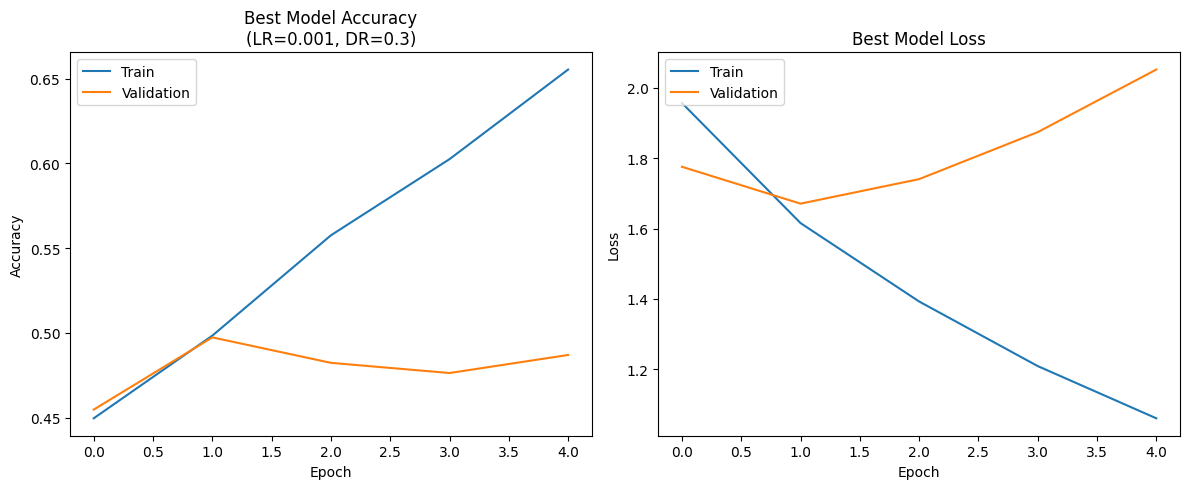

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Add, Activation
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# ==============================
# 1. Load Dataset
# ==============================
try:
    # Use the correct file path for your uploaded dataset
    file_path = "hate_speech_hindi_cleaned (2).csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    exit()


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences
embedding_dim = 100 # Dimension of the word embeddings

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Function to Build ResNet Style Model
# ==============================

def build_resnet_model(learning_rate=1e-3, dropout_rate=0.5):
    """Builds and compiles a ResNet-style CNN model with given hyperparameters."""

    inputs = Input(shape=(max_len,))

    # Embedding Layer
    embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len)(inputs)

    # Initial Convolution
    x = Conv1D(filters=64, kernel_size=5, padding='same', activation='relu')(embedding_layer)

    # --- Residual Block 1 ---
    shortcut = x
    res_x = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
    res_x = Conv1D(filters=64, kernel_size=3, padding='same')(res_x)
    x = Add()([shortcut, res_x])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # --- Residual Block 2 (with projection for dimension change) ---
    shortcut = x
    # 1x1 conv to project shortcut to the same dimension as the main path
    shortcut = Conv1D(filters=128, kernel_size=1, padding='same')(shortcut)

    res_x = Conv1D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
    res_x = Conv1D(filters=128, kernel_size=3, padding='same')(res_x)
    x = Add()([shortcut, res_x])
    x = Activation('relu')(x)
    x = MaxPooling1D(pool_size=2)(x)

    # --- Classification Head ---
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ==============================
# 5. Hyperparameter Tuning
# ==============================

# Define the grid of hyperparameters to test
learning_rates = [1e-3, 1e-4]
dropout_rates = [0.3, 0.5]
batch_size = 32
epochs = 25 # Increase epochs, EarlyStopping will handle the rest

# Store results
best_acc = 0.0
best_params = {}
best_history = None
best_model_predictions = None

# Set up EarlyStopping callback
# This will stop training if the validation loss doesn't improve for 'patience' epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nStarting hyperparameter tuning...")

for lr in learning_rates:
    for dr in dropout_rates:
        print("-" * 50)
        print(f"Testing config: Learning Rate={lr}, Dropout Rate={dr}")

        # Build and summarize the model
        model = build_resnet_model(learning_rate=lr, dropout_rate=dr)
        if lr == learning_rates[0] and dr == dropout_rates[0]:
            print("\nModel Summary:")
            model.summary()


        # Train the model
        history = model.fit(
            X_train, y_train,
            validation_data=(X_test, y_test),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping], # Add early stopping
            verbose=1
        )

        # Evaluate the model
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

        # Get predictions to calculate F1 score
        y_pred_prob = model.predict(X_test, verbose=0)
        y_pred = np.argmax(y_pred_prob, axis=1)
        f1 = f1_score(y_test, y_pred, average='weighted')

        print(f"  → Test Accuracy: {accuracy:.4f}")
        print(f"  → Test F1 Score (Weighted): {f1:.4f}")

        # Check if this is the best model so far based on accuracy
        if accuracy > best_acc:
            best_acc = accuracy
            best_params = {'learning_rate': lr, 'dropout_rate': dr}
            best_history = history
            best_model_predictions = y_pred


# ==============================
# 6. Display Best Results
# ==============================

print("\n" + "=" * 50)
print("Hyperparameter tuning complete.")
print(f"\nBest Test Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)
print("=" * 50)

# Display the classification report for the best model
if best_model_predictions is not None:
    print("\nClassification Report for the Best Model:")
    # Get class names from the label encoder to make the report readable
    class_names = label_encoder.classes_
    print(classification_report(y_test, best_model_predictions, target_names=class_names))


# ==============================
# 7. Plot Training History of the Best Model
# ==============================

def plot_history(history, params):
    """Plots the training history of the best performing model."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Best Model Accuracy\n(LR={params["learning_rate"]}, DR={params["dropout_rate"]})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if best_history:
    print("\nDisplaying training history for the best model...")
    plot_history(best_history, best_params)



This code builds a ResNet-inspired CNN for Hindi hate speech detection.
It combines the strengths of convolution (for text feature extraction) and residual learning (for better gradient flow), then tunes hyperparameters (learning rate, dropout) to achieve the best classification accuracy and F1-score.

VGG11, VGG13, VGG16, and VGG19

Dataset loaded successfully.
Sample Data:
                                                 text              label  \
0  मेरे देश के हिन्दु बहुत निराले है। कुछ तो पक्क...        hate,vulgar   
1  सरकार हमेशा से किसानों की कमाई को बढ़ाने के लि...           non-hate   
2  सुशांत ने जो बिजनेस डील 9 जून को की थी, वो डील...           non-hate   
3  @prabhav218 साले जेएनयू छाप कमिने लोग हिन्दुओं...  defamation,vulgar   
4  #unlock4guidelines - अनलॉक-4 के लिए गाइडलाइन्स...           non-hate   

   defamation  hate  non-hate  violence  vulgar  text_length  num_labels  \
0           0     1         0         0       1           24           2   
1           0     0         1         0       0           24           1   
2           0     0         1         0       0           37           1   
3           1     0         0         0       1           28           2   
4           0     0         1         0       0           57           1   

   has_hashtag  has_mention  has_url  \
0        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_106 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_56 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_107 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_57 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_108 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_109 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_58 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_110 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_111 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_59 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_112 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_113 (Conv1D)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_60 (MaxPooling1D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 157s 327ms/step - accuracy: 0.3970 - loss: 2.4036 - val_accuracy: 0.4529 - val_loss: 1.8573
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 209s 343ms/step - accuracy: 0.4608 - loss: 1.8527 - val_accuracy: 0.4611 - val_loss: 1.7550
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 197s 332ms/step - accuracy: 0.4879 - loss: 1.6733 - val_accuracy: 0.4619 - val_loss: 1.7633
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 151s 330ms/step - accuracy: 0.5019 - loss: 1.6004 - val_accuracy: 0.4734 - val_loss: 1.7403
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 200s 325ms/step - accuracy: 0.5224 - loss: 1.4817 - val_accuracy: 0.4644 - val_loss: 1.9120
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 202s 326ms/step - accuracy: 0.5493 - loss: 1.4003 - val_accuracy: 0.4606 - val_loss: 1.8209
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 201s 324ms/step - accuracy: 0.5528 - loss: 1.3738 - val_accuracy: 0.4573 - val_loss: 2.2227
  → Test Accuracy: 0.4734
  → Test F1 Score (Weighted): 0.3685
-------------

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 157s 337ms/step - accuracy: 0.4048 - loss: 2.3689 - val_accuracy: 0.4341 - val_loss: 2.0005
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 156s 340ms/step - accuracy: 0.4320 - loss: 1.9913 - val_accuracy: 0.4532 - val_loss: 1.8429
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 202s 341ms/step - accuracy: 0.4634 - loss: 1.7731 - val_accuracy: 0.4630 - val_loss: 1.7907
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 201s 338ms/step - accuracy: 0.4871 - loss: 1.6517 - val_accuracy: 0.4671 - val_loss: 1.8444
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 155s 339ms/step - accuracy: 0.5078 - loss: 1.5739 - val_accuracy: 0.4426 - val_loss: 1.7959
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 201s 336ms/step - accuracy: 0.5189 - loss: 1.5029 - val_accuracy: 0.4608 - val_loss: 1.8944
  → Test Accuracy: 0.4630
  → Test F1 Score (Weighted): 0.3419
--------------------------------------------------
🔎 Testing config: Version=vgg16
Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 244s 524ms/step - accuracy: 0.4020 - loss: 2.5461 - val_accuracy: 0.4341 - val_loss: 2.0199
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 259s 516ms/step - accuracy: 0.4382 - loss: 2.1307 - val_accuracy: 0.4314 - val_loss: 1.9347
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 235s 513ms/step - accuracy: 0.4439 - loss: 1.9667 - val_accuracy: 0.4543 - val_loss: 1.9069
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 262s 514ms/step - accuracy: 0.4560 - loss: 1.9283 - val_accuracy: 0.4617 - val_loss: 1.7961
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 238s 519ms/step - accuracy: 0.4865 - loss: 1.7169 - val_accuracy: 0.4685 - val_loss: 1.7630
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 266s 527ms/step - accuracy: 0.5025 - loss: 1.5753 - val_accuracy: 0.4619 - val_loss: 2.0510
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 265s 535ms/step - accuracy: 0.5168 - loss: 1.5156 - val_accuracy: 0.4546 - val_loss: 1.8321
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 243s 530ms/step - accuracy: 0.5317 - loss: 1.45

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


458/458 ━━━━━━━━━━━━━━━━━━━━ 316s 678ms/step - accuracy: 0.4107 - loss: 2.5781 - val_accuracy: 0.4341 - val_loss: 2.1968
Epoch 2/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 325s 684ms/step - accuracy: 0.4411 - loss: 2.2231 - val_accuracy: 0.4341 - val_loss: 2.1947
Epoch 3/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 315s 687ms/step - accuracy: 0.4334 - loss: 2.2210 - val_accuracy: 0.4341 - val_loss: 2.1933
Epoch 4/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 323s 689ms/step - accuracy: 0.4360 - loss: 2.2187 - val_accuracy: 0.4341 - val_loss: 2.1934
Epoch 5/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 317s 693ms/step - accuracy: 0.4365 - loss: 2.2092 - val_accuracy: 0.4341 - val_loss: 2.1935
Epoch 6/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 316s 691ms/step - accuracy: 0.4386 - loss: 2.1975 - val_accuracy: 0.4341 - val_loss: 2.1932
Epoch 7/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 321s 701ms/step - accuracy: 0.4376 - loss: 2.2010 - val_accuracy: 0.4341 - val_loss: 2.1931
Epoch 8/25
458/458 ━━━━━━━━━━━━━━━━━━━━ 319s 697ms/step - accuracy: 0.4370 - loss: 2.20

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


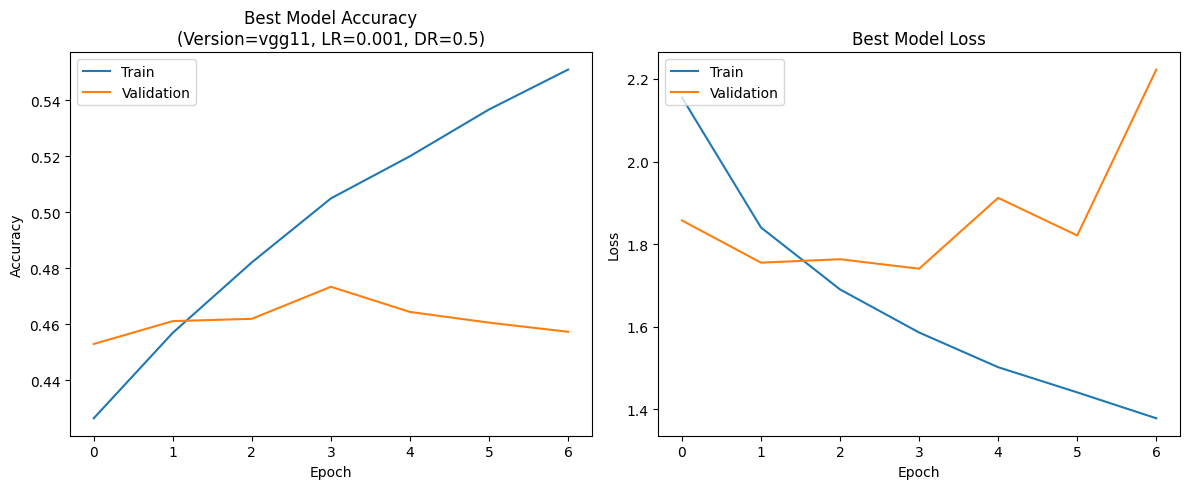

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# ==============================
# 1. Load Dataset
# ==============================
try:
    # Use the correct file path for your uploaded dataset
    file_path = "hate_speech_hindi_cleaned (2).csv"
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Sample Data:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please make sure the dataset file is in the same directory as the script or provide the full path.")
    exit()


# ==============================
# 2. Preprocess Data
# ==============================

# Use the 'text' column for features and 'label' for the target
# Ensure text column is treated as string and handle potential missing values
texts = df['text'].astype(str).fillna('').values
labels = df['label'].values

# Encode the string labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(np.unique(encoded_labels))

print(f"\nFound {num_classes} unique classes.")

# ==============================
# 3. Tokenize and Pad Text
# ==============================

max_words = 15000   # Maximum number of words to keep in the vocabulary
max_len = 120       # Maximum length of sequences
embedding_dim = 100 # Dimension of the word embeddings

# Create a tokenizer and fit it on the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to ensure they all have the same length
X = pad_sequences(sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# ==============================
# 4. Function to Build VGG Style Model
# ==============================

def build_vgg_model(version="vgg16", learning_rate=1e-3, dropout_rate=0.5):
    """Builds and compiles a VGG-style CNN model with given hyperparameters."""
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))

    if version == "vgg11":
        conv_layers = [1, 1, 2, 2, 2]
    elif version == "vgg13":
        conv_layers = [2, 2, 2, 2, 2]
    elif version == "vgg16":
        conv_layers = [2, 2, 3, 3, 3]
    elif version == "vgg19":
        conv_layers = [2, 2, 4, 4, 4]
    else:
        raise ValueError("Invalid VGG version. Choose from vgg11, vgg13, vgg16, vgg19.")

    filters = [64, 128, 256, 512, 512]

    for num_conv, f in zip(conv_layers, filters):
        for _ in range(num_conv):
            model.add(Conv1D(filters=f, kernel_size=3, activation='relu', padding='same'))
        model.add(MaxPooling1D(pool_size=2))

    # Classification Head
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# ==============================
# 5. Hyperparameter Tuning
# ==============================

# Define the grid of hyperparameters to test
vgg_versions = ["vgg11", "vgg13", "vgg16", "vgg19"]
# Fix learning rate and dropout rate to reduce training time
learning_rate = 1e-3
dropout_rate = 0.5
batch_size = 32
epochs = 25 # Increase epochs, EarlyStopping will handle the rest

# Store results
best_acc = 0.0
best_params = {}
best_history = None
best_model_predictions = None

# Set up EarlyStopping callback
# This will stop training if the validation loss doesn't improve for 'patience' epochs.
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\n🚀 Starting model comparison...")
print(f"Fixed Learning Rate: {learning_rate}, Fixed Dropout Rate: {dropout_rate}")


for version in vgg_versions:
    print("-" * 50)
    print(f"🔎 Testing config: Version={version}")

    # Build and summarize the model
    model = build_vgg_model(version=version, learning_rate=learning_rate, dropout_rate=dropout_rate)
    if version == vgg_versions[0]:
        print("\nModel Summary:")
        model.summary()


    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping], # Add early stopping
        verbose=1
    )

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Get predictions to calculate F1 score
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred = np.argmax(y_pred_prob, axis=1)
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"  → Test Accuracy: {accuracy:.4f}")
    print(f"  → Test F1 Score (Weighted): {f1:.4f}")

    # Check if this is the best model so far based on accuracy
    if accuracy > best_acc:
        best_acc = accuracy
        best_params = {'version': version, 'learning_rate': learning_rate, 'dropout_rate': dropout_rate}
        best_history = history
        best_model_predictions = y_pred


# ==============================
# 6. Display Best Results
# ==============================

print("\n" + "=" * 50)
print("Model comparison complete.")
print(f"\nBest Test Accuracy: {best_acc:.4f}")
print("Best Parameters:", best_params)
print("=" * 50)

# Display the classification report for the best model
if best_model_predictions is not None:
    print("\nClassification Report for the Best Model:")
    # Get class names from the label encoder to make the report readable
    class_names = label_encoder.classes_
    print(classification_report(y_test, best_model_predictions, target_names=class_names))


# ==============================
# 7. Plot Training History of the Best Model
# ==============================

def plot_history(history, params):
    """Plots the training history of the best performing model."""
    plt.figure(figsize=(12, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'Best Model Accuracy\n(Version={params["version"]}, LR={params["learning_rate"]}, DR={params["dropout_rate"]})')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Best Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

if best_history:
    print("\nDisplaying training history for the best model...")
    plot_history(best_history, best_params)



| Model     | Test Accuracy | Weighted F1 Score             | Notes                                        |
| --------- | ------------- | ----------------------------- | -------------------------------------------- |
| **VGG11** | **0.4734**    | **0.3685**                    | Best performing among the four               |
| VGG13     | 0.4630        | 0.3419                        | Slightly worse accuracy                      |
| VGG16     | 0.4685        | 0.3457                        | Close to VGG11 but slower                    |
| VGG19     | 0.4341        | 0.000 (stuck during training) | Training stagnated, likely overparameterized |


Best Model → VGG11

Simpler architecture, faster convergence.

Reasonable generalization given dataset size and complexity.


Why VGG19 Failed to Improve

VGG19 has too many convolutional layers, which:

Causes vanishing gradients with smaller datasets.

Needs much more data or pre-trained embeddings.

Overfits easily since text data has fewer spatial correlations than images.